In [ ]:
!wget https://github.com/wingsryder/Hackathon-Team26/blob/main/Telcom-Customer-Churn.csv

--2025-04-11 09:28:46--  https://github.com/wingsryder/Hackathon-Team26/blob/main/Telcom-Customer-Churn.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Telcom-Customer-Churn.csv’

Telcom-Customer-Chu     [ <=>                ]   1.62M  --.-KB/s    in 0.09s   

2025-04-11 09:28:47 (18.2 MB/s) - ‘Telcom-Customer-Churn.csv’ saved [1699727]



In [ ]:
# Phase 1: Structured Procedural Approach for Telco Churn Dataset

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Data Preparation

In [ ]:
# Load dataset
url = 'https://raw.githubusercontent.com/wingsryder/Hackathon-Team26/main/Telcom-Customer-Churn.csv'
df = pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
# Remove customerID
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Handling Missing values
df.replace(" ", np.nan, inplace=True)
df.dropna(inplace=True)
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [ ]:
# Encode Categorical Columns into binary
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

In [ ]:
# Converting other Categorical Columns using one hot encoding
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
# Split data into train/test
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [ ]:
# Train Models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC()
}
results = []

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Model Evaluation

In [ ]:
results_df = pd.DataFrame(results)
results_df.sort_values(by='F1 Score', ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.785359,0.618421,0.502674,0.554572
3,Gradient Boosting,0.789623,0.639286,0.478610,0.547401
2,Random Forest,0.778962,0.611307,0.462567,0.526636
1,Decision Tree,0.710732,0.460808,0.518717,0.488050
4,SVM,0.734186,0.000000,0.000000,0.000000


# Hyper-Parameter Tuning

In [ ]:
# Required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

class BaseModel:
    def __init__(self, model, param_grid=None):
        self.model = model
        self.param_grid = param_grid  # ✅ Store param_grid here
        self.best_model = None
        self.grid_search = None

    def fit(self, X_train, y_train):
        self.model.fit(X_train, y_train)
        self.best_model = self.model

    def evaluate(self, X_test, y_test):
        y_pred = self.best_model.predict(X_test)
        return {
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1 Score': f1_score(y_test, y_pred)
        }

    def tune(self, X_train, y_train, cv=5, scoring='f1'):
        if not self.param_grid:
            raise ValueError("Parameter grid is empty. Provide 'param_grid' for tuning.")
        self.grid_search = GridSearchCV(self.model, self.param_grid, cv=cv, scoring=scoring, n_jobs=-1)
        self.grid_search.fit(X_train, y_train)
        self.best_model = self.grid_search.best_estimator_
        return self.grid_search.best_params_

    def predict(self, X):
        return self.best_model.predict(X)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Reusable function to load and preprocess data
def load_and_prepare_data(file_path):
    df = pd.read_csv(file_path)

    # Drop unnecessary column
    if 'customerID' in df.columns:
        df.drop('customerID', axis=1, inplace=True)

    # Clean and convert numeric
    df.replace(" ", np.nan, inplace=True)
    df.dropna(inplace=True)
    df['TotalCharges'] = df['TotalCharges'].astype(float)

    # Encode binary columns
    binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
    df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

    # One-hot encode categorical columns
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

    # Split features and target
    X = df.drop('Churn', axis=1)
    y = df['Churn']

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

# Function successfully defined.
"Data loading function is now modular and reusable."


'Data loading function is now modular and reusable.'

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Logistic Regression Model subclass
class LogisticRegressionModel(BaseModel):
    def __init__(self):
        model = LogisticRegression(max_iter=1000)
        param_grid = {
            'C': [0.01, 0.1, 1, 10, 100],
            'penalty': ['l2'],
            'solver': ['lbfgs']
        }
        super().__init__(model, param_grid)

# Decision Tree

class DecisionTreeModel(BaseModel):
    def __init__(self):
        model = DecisionTreeClassifier()
        param_grid = {
            'criterion': ['gini', 'entropy'],
            'max_depth': [3, 5, 10, 20, 30, None],
            'min_samples_split': [2, 5, 10]
        }
        super().__init__(model, param_grid)

# Random Forest

class RandomForestModel(BaseModel):
    def __init__(self):
        model = RandomForestClassifier()
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [ None, 3, 5, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
        super().__init__(model, param_grid)

# Support Vector Machine

class SVMModel(BaseModel):
    def __init__(self):
        model = SVC()
        param_grid = {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf', 'poly'],
            'gamma': ['scale', 'auto']
        }
        super().__init__(model, param_grid)

# Gradient Boosting (sklearn)

class GradientBoostingModel(BaseModel):
    def __init__(self):
        model = GradientBoostingClassifier()
        param_grid = {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.05, 0.1, 0.2],
            'max_depth': [3, 5, 7, 10]
        }
        super().__init__(model, param_grid)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# 📊 Helper: Plot metric comparison across models
def plot_model_comparison(result_df, metric='F1 Score'):
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=result_df,
        x='Model',
        y=metric,
        hue='Phase',
        palette='Set2'
    )
    plt.title(f'{metric} Comparison Across Models (Before vs After Tuning)')
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.xticks(rotation=45)
    plt.legend(title='Phase')
    plt.tight_layout()
    plt.show()

# 📊 Helper: Confusion Matrix for tuned model
def plot_confusion_matrix_custom(model_wrapper, X_test, y_test, title='Confusion Matrix'):
    y_pred = model_wrapper.predict(X_test)
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    disp.plot(cmap='Blues')
    plt.title(title)
    plt.grid(False)
    plt.show()

# 🔁 Final Integrated Pipeline
def run_pipeline(filepath, model_classes):
    # Load and Prepare Data
    X_train, X_test, y_train, y_test = load_and_prepare_data(filepath)

    all_results = []
    tuned_models = []

    # Loop through each Model class
    for ModelClass in model_classes:
        model_name = ModelClass.__name__.replace('Model', '')
        model = ModelClass()
        print(f"\n🚀 Running Model: {model_name}")

        # Initial training
        model.fit(X_train, y_train)
        before_tuning = model.evaluate(X_test, y_test)

        # Tuning
        try:
            best_params = model.tune(X_train, y_train)
        except Exception as e:
            best_params = f'Tuning Failed: {e}'

        after_tuning = model.evaluate(X_test, y_test)

        # Store model for post-analysis (e.g., confusion matrix)
        tuned_models.append((model_name, model))

        # Append results
        all_results.append({
            'Model': model_name,
            'Phase': "Before Tuning",
            **before_tuning
        })
        all_results.append({
            'Model': model_name,
            'Phase': "After Tuning",
            'Accuracy': after_tuning['Accuracy'],
            'Precision': after_tuning['Precision'],
            'Recall': after_tuning['Recall'],
            'F1 Score': after_tuning['F1 Score'],
            'Best Hyperparameters': best_params if isinstance(best_params, dict) else None
        })

    # Create result DataFrame
    result_df = pd.DataFrame(all_results)
    result_df = result_df[['Model', 'Phase', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Best Hyperparameters']]

    # 📊 Visualization
    plot_model_comparison(result_df, metric='Accuracy')
    plot_model_comparison(result_df, metric='F1 Score')

    # 📈 Confusion matrices (only after tuning)
    for model_name, model in tuned_models:
        print(f"\n🧩 Confusion Matrix: {model_name} (After Tuning)")
        plot_confusion_matrix_custom(model, X_test, y_test, title=f'{model_name} - After Tuning')

    return result_df



🚀 Running Model: LogisticRegression

🚀 Running Model: DecisionTree

🚀 Running Model: RandomForest

🚀 Running Model: SVM

🚀 Running Model: GradientBoosting


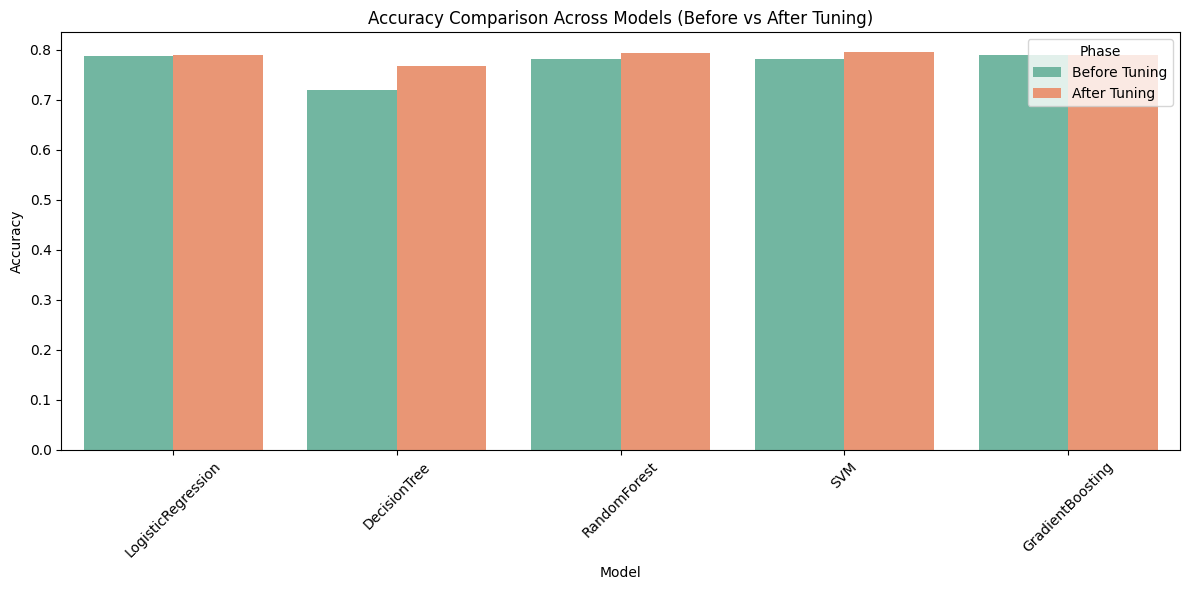

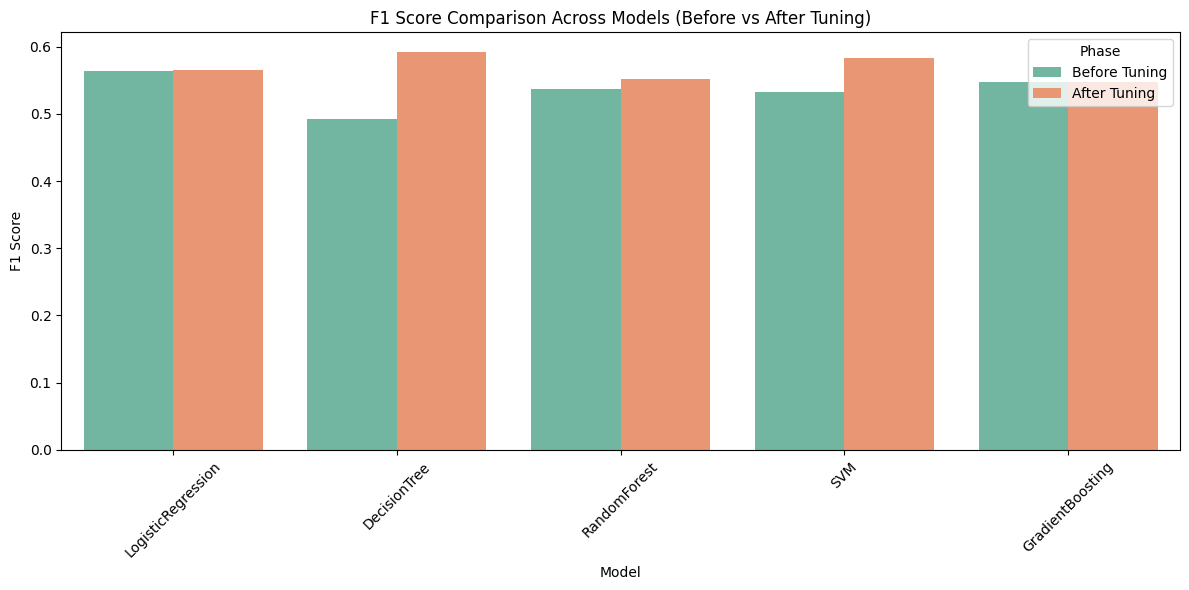


🧩 Confusion Matrix: LogisticRegression (After Tuning)


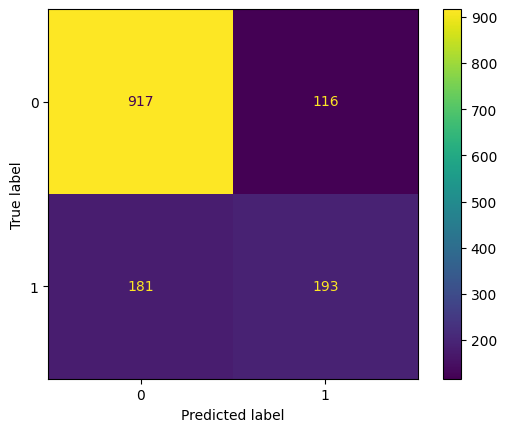

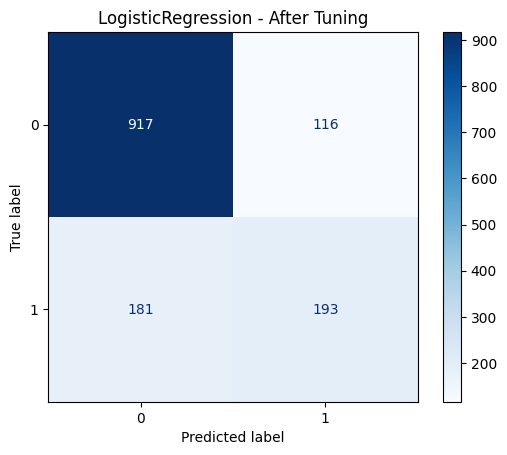


🧩 Confusion Matrix: DecisionTree (After Tuning)


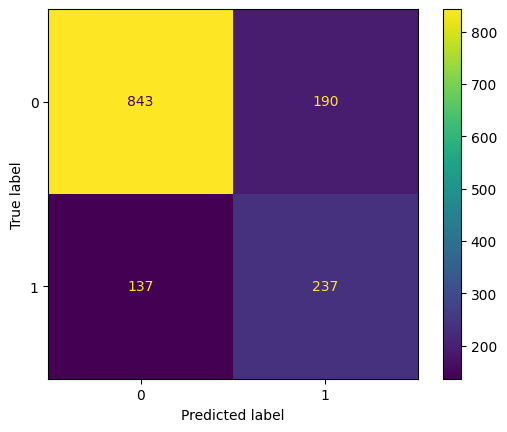

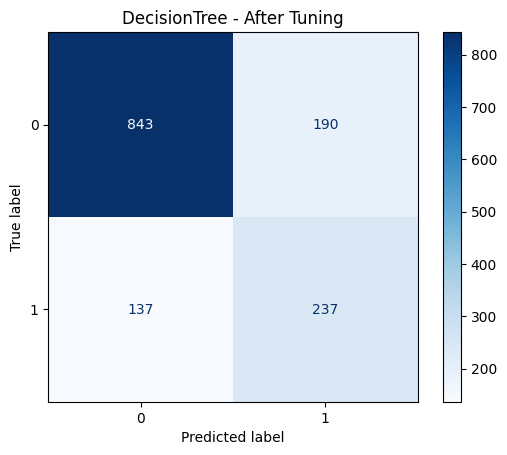


🧩 Confusion Matrix: RandomForest (After Tuning)


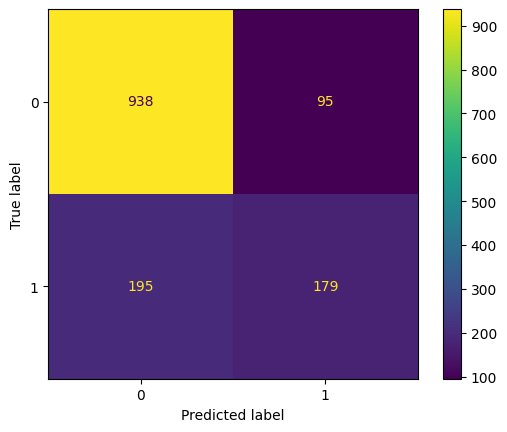

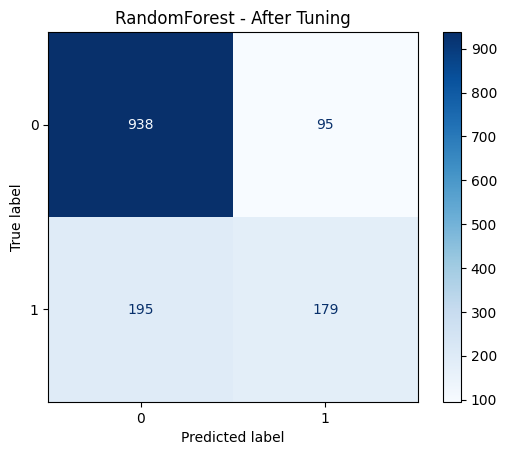


🧩 Confusion Matrix: SVM (After Tuning)


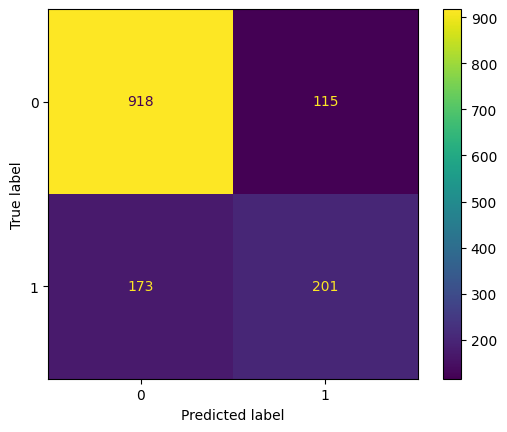

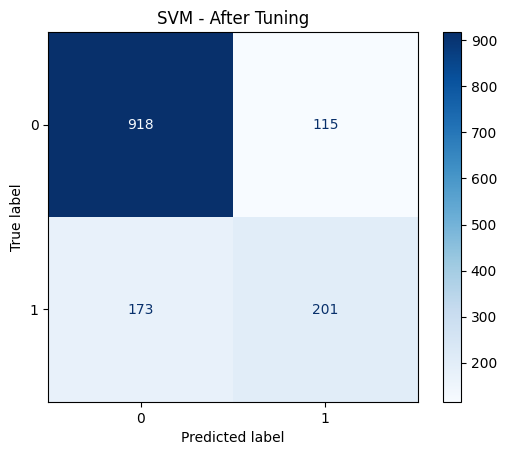


🧩 Confusion Matrix: GradientBoosting (After Tuning)


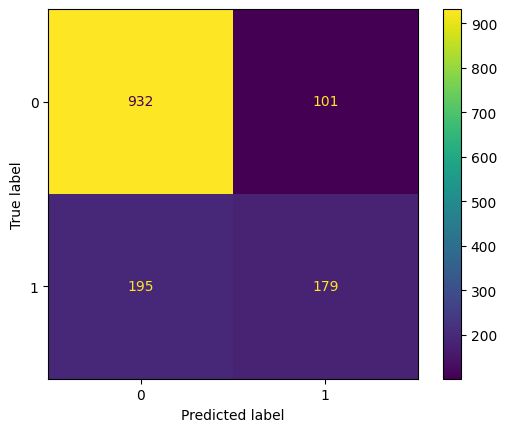

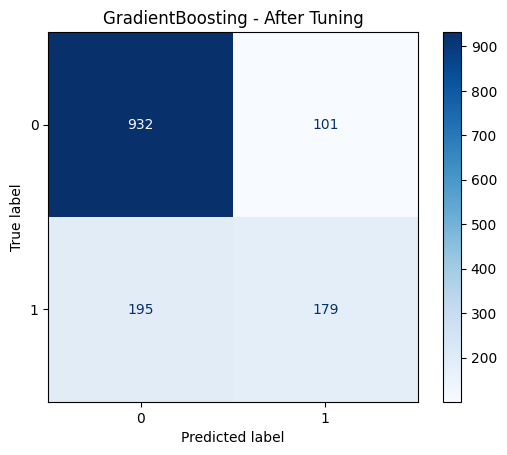

In [ ]:
file_path = 'https://raw.githubusercontent.com/wingsryder/Hackathon-Team26/main/Telcom-Customer-Churn.csv'  # or your uploaded/local file
result_df = run_pipeline(file_path, [
    LogisticRegressionModel,
    DecisionTreeModel,
    RandomForestModel,
    SVMModel,
    GradientBoostingModel
])


In [ ]:
from IPython.display import display
display(result_df.sort_values(by="F1 Score", ascending=False))


,Model,Phase,Accuracy,Precision,Recall,F1 Score,Best Hyperparameters
3,DecisionTree,After Tuning,0.767591,0.555035,0.633690,0.591760,"{'criterion': 'entropy', 'max_depth': 5, 'min_..."
7,SVM,After Tuning,0.795309,0.636076,0.537433,0.582609,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}"
1,LogisticRegression,After Tuning,0.788913,0.624595,0.516043,0.565154,"{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}"
0,LogisticRegression,Before Tuning,0.787491,0.620579,0.516043,0.563504,NaN
8,GradientBoosting,Before Tuning,0.789623,0.639286,0.478610,0.547401,NaN
9,GradientBoosting,After Tuning,0.789623,0.639286,0.478610,0.547401,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."
5,RandomForest,After Tuning,0.791045,0.645985,0.473262,0.546296,"{'max_depth': 10, 'min_samples_split': 5, 'n_e..."
4,RandomForest,Before Tuning,0.786070,0.628975,0.475936,0.541857,NaN
6,SVM,Before Tuning,0.781095,0.616197,0.467914,0.531915,NaN
2,DecisionTree,Before Tuning,0.718550,0.473039,0.516043,0.493606,NaN
